Muhammad Irfan Hilman

FTDS Batch 16

# I. Perkenalan

Pada project kali ini saya akan membuat model deep learning untuk memprediksi customer churn pada perusahaan telekomunikasi. Dataset yg digunakan bersumber dari https://www.kaggle.com/datasets/blastchar/telco-customer-churn. Pemodelan ANN dilakukan menggunakan metode Sequential API dan Functional API. Pipeline dari library TensorFlow digunakan untuk membantu proses batch, repeat dan shuffle data.

Problem Statement:

1. Melakukan exploratory data analysis (EDA) terhadap dataset telco customer churn

2. Membuat pipeline TensorFlow utk loading data berukuran besar

2. Membuat prediksi customer churn dengan menggunakan model artificial neural network (ANN) dgn metode Sequential API dan Functional API

3. Melakukan evaluasi performance model dan menarik kesimpulan

Pengerjaan akan dilakukan menggunakan Google Colab

# II. Import Libraries

Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [36]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import joblib

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, concatenate, BatchNormalization, Dropout
from tensorflow.keras import Model
from tensorflow.keras.models import load_model

# Terapkan random_seed agar hasil modelling tdk berubah2
np.random.seed(50)
tf.random.set_seed(50)

# III. Data Loading

Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [37]:
# Data Loading
df = pd.read_csv('https://raw.githubusercontent.com/IrfanHilman/FTDS_Hacktiv8_Batch_16/main/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [38]:
# Gunakan options untuk menampilkan semua kolom
pd.options.display.max_columns = None

# Tampilkan 5 baris pertama df
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [39]:
# Tampilkan 5 baris terakhir df
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [40]:
# Tampilkan ukuran df
df.shape

(7043, 21)

In [41]:
# Tampilkan nama kolom dan dtype pada df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Dataset terdiri dari 21 kolom dan 7043 baris

In [42]:
# Tampilkan nilai unik masing2 kolom
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

# IV. Exploratory Data Analysis (EDA)

Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

<ipython-input-43-b55a4a719048>:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(pd.DataFrame(df['Churn'].value_counts()),colors=palette_color, autopct='%.0f%%', wedgeprops={"edgecolor":"k"})


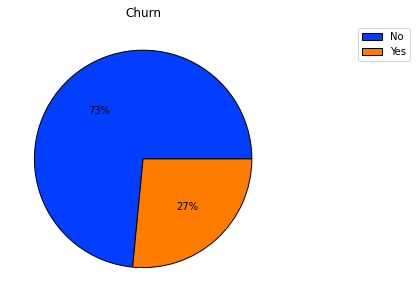

In [43]:
# Buat label utk legend pada pie chart
palette_color = sns.color_palette('bright')
label = list(pd.DataFrame(df['Churn'].value_counts()).index)

# Buat figure dan plot pie chart
plt.figure(figsize = (5, 5))
plt.title('Churn')
plt.pie(pd.DataFrame(df['Churn'].value_counts()),colors=palette_color, autopct='%.0f%%', wedgeprops={"edgecolor":"k"})
plt.legend(label, loc='upper right',bbox_to_anchor=(1.5,1))

plt.show()

27% user mengalami churn dan 73% user tetap memakai jasa telekomunikasi

<ipython-input-44-20cbd843e7fd>:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(pd.DataFrame(df['gender'].value_counts()),colors=palette_color, autopct='%.0f%%', wedgeprops={"edgecolor":"k"})


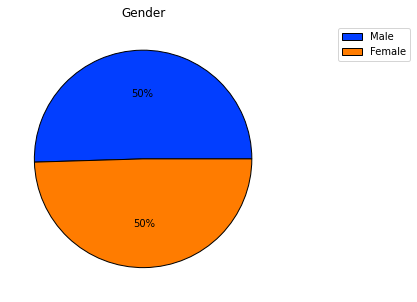

In [44]:
# Buat label utk legend pada pie chart
label1 = list(pd.DataFrame(df['gender'].value_counts()).index)

# Buat figure dan plot pie chart
plt.figure(figsize = (5, 5))
plt.title('Gender')
plt.pie(pd.DataFrame(df['gender'].value_counts()),colors=palette_color, autopct='%.0f%%', wedgeprops={"edgecolor":"k"})
plt.legend(label1, loc='upper right',bbox_to_anchor=(1.5,1))

plt.show()

Proporsi gender berimbang pada dataset ini (50:50)

<ipython-input-45-c98adf01e05a>:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(pd.DataFrame(df['SeniorCitizen'].value_counts()),colors=palette_color, autopct='%.0f%%', wedgeprops={"edgecolor":"k"})


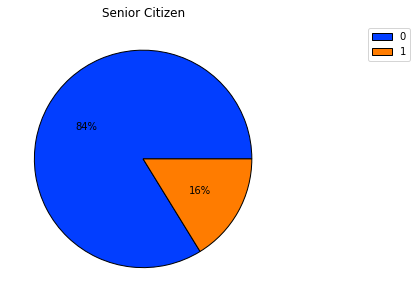

In [45]:
# Buat label utk legend pada pie chart
label2 = list(pd.DataFrame(df['SeniorCitizen'].value_counts()).index)

# Buat figure dan plot pie chart
plt.figure(figsize = (5, 5))
plt.title('Senior Citizen')
plt.pie(pd.DataFrame(df['SeniorCitizen'].value_counts()),colors=palette_color, autopct='%.0f%%', wedgeprops={"edgecolor":"k"})
plt.legend(label2, loc='upper right',bbox_to_anchor=(1.5,1))

plt.show()

Sebanyak 16% user adalah warga negara senior.

<ipython-input-46-ded4af49396b>:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(pd.DataFrame(df['Dependents'].value_counts()),colors=palette_color, autopct='%.0f%%', wedgeprops={"edgecolor":"k"})


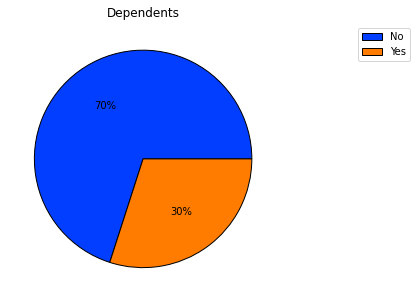

In [46]:
# Buat label utk legend pada pie chart
label3 = list(pd.DataFrame(df['Dependents'].value_counts()).index)

# Buat figure dan plot pie chart
plt.figure(figsize = (5, 5))
plt.title('Dependents')
plt.pie(pd.DataFrame(df['Dependents'].value_counts()),colors=palette_color, autopct='%.0f%%', wedgeprops={"edgecolor":"k"})
plt.legend(label3, loc='upper right',bbox_to_anchor=(1.5,1))

plt.show()

Sebanyak 30% user memiliki tanggungan (anak atau istri). Berhubung kehadiran tanggungan dapat mempengaruhi pengeluaran user, kita perlu tahu apakah hal tsb dpt mempengaruhi churn rate.

In [47]:
# Kelompokkan data dependents berdasarkan data churns
churn_dependent = pd.DataFrame(df.groupby('Churn')['Dependents'].value_counts())
churn_dependent

Dependents
Churn Dependents            
No    No                3390
      Yes               1784
Yes   No                1543
      Yes                326

Kita lihat bahwa keberadaan tanggungan tidak terlalu mempengaruhi user dlm melakukan churn pada layanan telekom.

Berikutnya kita ingin melihat plot distribusi lama tenure pada data user:

Text(0.5, 1.0, 'Tenure')

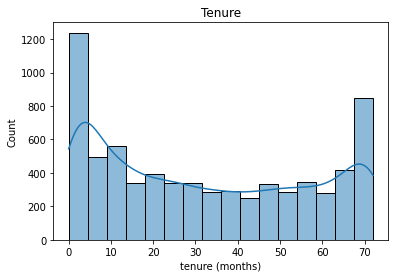

In [48]:
# Plot histogram tenure
sns.histplot(data=df, x="tenure", kde=True)
plt.xlabel('tenure (months)')
plt.title('Tenure')

User dgn masa tenure pendek (0-10 bulan) dan masa tenure panjang (60-70 bulan) lbh banyak dibandingkan pada masa tenure lainnya. Kita akan lihat rata2 lama tenure pada user yg mengalami churn dan yg tidak churn:

In [49]:
# Kelompokkan rata2 lama tenure terhadap kolom churn
churn_tenure = pd.DataFrame(df.groupby('Churn')['tenure'].mean())
churn_tenure

,tenure
Churn,
No,37.569965
Yes,17.979133


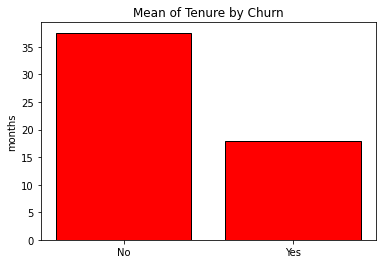

In [50]:
# Plot diagram batang ata2 lama tenure terhadap churn
plt.bar(churn_tenure.index, churn_tenure['tenure'], color='r', edgecolor='k')
plt.ylabel('months')
plt.title('Mean of Tenure by Churn')

plt.show()

Ternyata user yg mengalami churn memiliki rata2 masa tenure jauh lebih sebentar (18 bulan) dibandingkan user yg bertahan (37 bulan). 

In [51]:
# Kelompokkan kolom multiplelines terhadap kolom churn
churn_mlines = pd.DataFrame(df.groupby('MultipleLines')['Churn'].value_counts())
churn_mlines

Churn
MultipleLines    Churn       
No               No      2541
                 Yes      849
No phone service No       512
                 Yes      170
Yes              No      2121
                 Yes      850

Kita lihat label utk MultipleLines tdk berpengaruh terhadap churn

In [52]:
# Kelompokkan kolom InternetServices terhadap kolom churn
churn_iservice = pd.DataFrame(df.groupby('InternetService')['Churn'].value_counts())
churn_iservice

Churn
InternetService Churn       
DSL             No      1962
                Yes      459
Fiber optic     No      1799
                Yes     1297
No              No      1413
                Yes      113

User dgn layanan melalui fiber optic memiliki tingkat churn paling besar (1297), dibandingkan DSL (459) dan tanpa internet service (113). Hal ini mengindikasikan terdapat masalah pada layanan fiber optic. Kita akan lihat apakah keberadaan techincal support berpengaruh terhadap churn:

In [53]:
# Kelompokkan kolom techical support terhadap kolom churn
churn_ts = pd.DataFrame(df.groupby('TechSupport')['Churn'].value_counts())
churn_ts

Churn
TechSupport         Churn       
No                  No      2027
                    Yes     1446
No internet service No      1413
                    Yes      113
Yes                 No      1734
                    Yes      310

User yg tidak mendapat technical support mengalami jauh lbh banyak churn (1446) dibandingkan yg mendapat technical support (310). Artinya technical support sangat berpengaruh terhadap churn rate. Mari kita perdalam lagi jumlah churn pada user yg menggunakan fiber optic tanpa technical support:

In [54]:
# Kelompokkan user dgn fiber optic terhadap technical support dan churn
fiber_ts_churn = pd.DataFrame(df.loc[df['InternetService']=='Fiber optic',['TechSupport','Churn']])
df_fiber_ts_churn = pd.DataFrame(fiber_ts_churn.groupby('TechSupport')['Churn'].value_counts())
df_fiber_ts_churn

Churn
TechSupport Churn       
No          No      1129
            Yes     1101
Yes         No       670
            Yes      196

Pada user dgn fiber optic tanpa technical support, jumlah user yg mengalami churn (1101) sama banyaknya dgn user yg tidak churn (1129). 

In [55]:
# Hitung jumlah user yg mengalami churn dan tidak
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Terdapat 1869 user mengalami churn. Mari kita hitung persentase user dgn fiber optic tanpa technical support yg mengalami churn dgn jumlah churn secara keseluruhan:

In [56]:
churn_ratio = df_fiber_ts_churn['Churn'][1]/df['Churn'].value_counts()[1]
print('Churn rate user dgn layanan fiber optik tanpa tech support adalah: ', churn_ratio*100)

Churn rate user dgn layanan fiber optik tanpa tech support adalah:  58.90850722311396


Persentase user dgn fiber optik tanpa layanan technical support yg mengalami churn adalah 58% dari keseluruhan jumlah churn. Layanan fiber optik merupakan teknologi paling canggih saat ini yg bertujuan utk mempercepat bandwidth internet. Namun, tampaknya banyak user mengalami kendala teknis oleh layanan ini dan ketika mereka tdk mendapatkan technical support dari provider, mereka cenderung akan menghentikan layanan.

In [57]:
# Kelompokkan kolom streamingTV dan kolom churn
churn_streamtv = pd.DataFrame(df.groupby('StreamingTV')['Churn'].value_counts())
churn_streamtv

Churn
StreamingTV         Churn       
No                  No      1868
                    Yes      942
No internet service No      1413
                    Yes      113
Yes                 No      1893
                    Yes      814

Layanan streaming TV tdk mempengaruhi churn rate

In [58]:
# Kelompokkan kolom StreamingMovies dan kolom churn
churn_streamm = pd.DataFrame(df.groupby('StreamingMovies')['Churn'].value_counts())
churn_streamm

Churn
StreamingMovies     Churn       
No                  No      1847
                    Yes      938
No internet service No      1413
                    Yes      113
Yes                 No      1914
                    Yes      818

Layanan streaming film tdk mempengaruhi churn rate. Berikutnya kita akan melihat persebaran masa kontrak antara user dan provider telekom

<ipython-input-59-f4c70529c174>:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(pd.DataFrame(df['Contract'].value_counts()),colors=palette_color, autopct='%.0f%%', wedgeprops={"edgecolor":"k"})


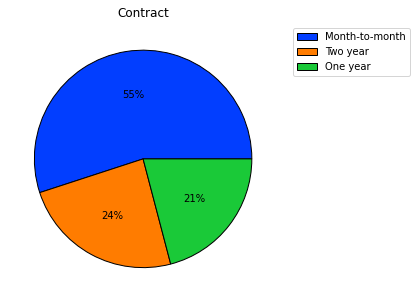

In [59]:
# Buat label utk legend pada pie chart
palette_color = sns.color_palette('bright')
label4 = list(pd.DataFrame(df['Contract'].value_counts()).index)

# Buat figure dan plot pie chart
plt.figure(figsize = (5, 5))
plt.title('Contract')
plt.pie(pd.DataFrame(df['Contract'].value_counts()),colors=palette_color, autopct='%.0f%%', wedgeprops={"edgecolor":"k"})
plt.legend(label4, loc='upper right',bbox_to_anchor=(1.5,1))

plt.show()

Mayoritas user (55%) memilih kontrak bulanan dibandingkan kontrak 2 tahun (24%) dan 1 tahun (21%). Kita lihat apakah ada pengaruh masa kontrak thd churn:

In [60]:
# Kelompokkan kolom kontrak dan kolom churn
churn_contract = pd.DataFrame(df.groupby('Contract')['Churn'].value_counts())
churn_contract

Churn
Contract       Churn       
Month-to-month No      2220
               Yes     1655
One year       No      1307
               Yes      166
Two year       No      1647
               Yes       48

Ternyata user dgn month-to-month kontrak jauh lbh banyak mengalami churn (1655) dibandingkan user dgn 1 year (166) dan 2 year (48). Kita akan hitung thd jumlah churn scr keseluruhan:

In [61]:
print('Churn rate user dgn month-to-month contract adalah: ', (churn_contract['Churn'][1]/df['Churn'].value_counts()[1])*100)

Churn rate user dgn month-to-month contract adalah:  88.55002675227395


Persentase user dgn kontrak bulanan yg mengalami churn adalah sebesar 88% dari jumlah churn keseluruhan. Hal ini mengindikasikan jika sebagian user yg mengalami churn adalah user yg baru mencoba2 layanan telekomunikasi dari perusahaan sehingga memakai kontrak bulanan agar lbh hemat. Entah krn mereka kecewa dgn service yg diberikan atau menemukan layanan dari kompetitor yg lbh baik, mereka akhirnya memutuskan utk menghentikan layanan telekomunikasi mereka.

In [62]:
# Kelompokkan kolom payment method dan kolom churn
churn_pm = pd.DataFrame(df.groupby('PaymentMethod')['Churn'].value_counts())
churn_pm

Churn
PaymentMethod             Churn       
Bank transfer (automatic) No      1286
                          Yes      258
Credit card (automatic)   No      1290
                          Yes      232
Electronic check          No      1294
                          Yes     1071
Mailed check              No      1304
                          Yes      308

User dgn electronic check paling banyak mengalami churn (1071) dibanding user dgn metode pembayaran lainnya. Artinya sedikit banyak metode pembayaran berpengaruh thd tingkat churn

In [63]:
# Kelompokkan kolom monthly charges dan kolom churn. Hitung jumlah rata2 monthly charges
churn_mc = pd.DataFrame(df.groupby('Churn')['MonthlyCharges'].mean())
churn_mc

,MonthlyCharges
Churn,
No,61.265124
Yes,74.441332


User yg churn membayar sedikit lbh banyak biaya bulanan (74) diandingkan user yg tidak churn (61). Mari kita lihat perbandingannya dgn total biaya yg dibayar.

In [64]:
# Ubah data TotalCharges menjadi numerik
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [65]:
# Kelompokkan kolom total charges dan kolom churn. Hitung jumlah rata2 total charges
churn_tc = pd.DataFrame(df.groupby('Churn')['TotalCharges'].mean())
churn_tc

,TotalCharges
Churn,
No,2555.344141
Yes,1531.796094


Keanehan terjadi krn user yg churn membayar total charges lbh sedikit (1531 vs 2555) namun monthly charge lbh besar (74 vs 61). Artinya harga layanan telekomunikasi berpengaruh thd keputusah user utk churn atau tidak. Harga terlalu mahal menyebabkan user menghentikan layanan dgn masa kontrak lbh singkat

Berikutnya kita akan lihat perbandingan harga pada layanan fiber optic, DSL dan tanpa internet:

In [66]:
# Kelompokkan kolom internet service, tech support dan rata2 total charges
iservice_tc = pd.DataFrame(df.groupby(['InternetService','TechSupport'])['TotalCharges'].mean())
iservice_tc

TotalCharges
InternetService TechSupport                      
DSL             No                    1310.869646
                Yes                   2975.562819
Fiber optic     No                    2523.760740
                Yes                   4960.319284
No              No internet service    665.220329

Layanan fiber optik memiliki harga paling mahal pada option tanpa technical support (2523) dan dengan technical support (4960). Kita ketahui sebelumnya bahwa layanan fiber optik tanpa technical support mengakibatkan banyak churn pada user (58% dari total jumlah churn). Dari sini kita mendapat informasi jika harga layanan fiber optik terlalu mahal bagi customer. Ditambah lagi adanya banyak technical error pada user yg tdk mendapat technical support meningkatkan kecenderungan user utk menghentikan layanan.

### Kesimpulan EDA

•	User yg churn mempunyai rata2 tenure (masa kontrak) lbh pendek (18  bulan) dibandingkan user yg non-churn (38 bulan), namun membayar monthly charges lbh besar (74). Artinya, harga berpengaruh terhadap keputusan user utk churn. User yg membayar mahal tanpa disertai layanan memuaskan akan lbh cepat mengalami churn

•	User yg menggunakan fiber optic tanpa technical support mengalami lebih banyak churn (58% dari total churn). Layanan fiber optic mempunyai biaya lbh mahal dibandingkan DSL dan no-internet, krn teknologinya lbh advanced. Namun, teknologi tsb dapat menghadirkan kompleksitas bagi user dan ketika tidak disertai dukungan technical support dpt menyebabkan user menjadi frustasi dan menghentikan layanan. 

•	User dgn kontrak bulanan lebih mungkin mengalami churn (88% dari total churn) dibandingkan user dgn kontrak setahun atau 2 tahun. Artinya sebagian user hanya berminat utk mencoba2 layanan sehingga memilih opsi pembayaran bulanan. Begitu didapati layanan tdk memuaskan dan terdapat layanan dari competitor lain yg lbh baik, user berpotensi utk churn


# V. Data Preprocessing

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

Pertama, kita akan memisahkan dataset inference dgn dataset utk training dan testing.

### Get Data for Model Inference

Buat dataset utk model inference sebanyak 20 baris.

In [67]:
# Get Data for Model Inference
df_inf = df.sample(20, random_state=100)
df_inf.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4880,1215-EXRMO,Male,0,Yes,No,50,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.55,1067.65,No
1541,2429-AYKKO,Male,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.85,1434.10,No
1289,9968-FFVVH,Male,0,No,No,63,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,No,One year,No,Bank transfer (automatic),68.80,4111.35,No
5745,3580-GICBM,Female,0,Yes,Yes,61,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.20,1445.20,No
4873,2320-YKQBO,Female,0,No,No,7,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.30,144.95,No


Hapus dataset inference dari df

In [68]:
# Remove Inference Set from Dataset
df_train_test = df.drop(df_inf.index)
df_train_test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Reset index stlh penghapusan baris dataset inference

In [69]:
# Reset Index
df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)

### Splitting between `X` and `y`

Kita akan pisahkan dataset fitur (X) dan target (y). Target adalah kolom 'Churn'

In [70]:
# Splitting between `X` and `y`
X = df_train_test.drop('Churn', axis=1)
y = df_train_test['Churn']

Ganti label y menjadi 0 dan 1:

In [71]:
# Ganti label y
y = y.replace(['Yes','No'],[1,0])

Lakukan splitting utk training set, test set dan validation set.

In [72]:
# Split between Train-Set, Val-Set, and Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=100)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

Train Size :  (4494, 20)
Val Size :  (1124, 20)
Test Size :  (1405, 20)


### Feature Selection

Kita akan lakukan feature selection. Tampilkan 5 baris pertama dataset training

In [73]:
# Display X_train
X_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3904,6319-IEJWJ,Male,0,Yes,Yes,20,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,90.20,1776.55
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40
6694,7315-WYOAW,Male,0,No,No,13,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,No,Electronic check,100.75,1313.25
1429,1571-SAVHK,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,99.95,1132.75
3714,6352-GIGGQ,Male,0,No,No,67,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),88.80,5903.15


Kita akan drop kolom customerID pada X_train, X_val, X_test krn tidak dibutuhkan utk proses pemodelan.

In [74]:
# Drop Columns
X_train.drop(['customerID'], axis=1, inplace=True)
X_val.drop(['customerID'], axis=1, inplace=True)
X_test.drop(['customerID'], axis=1, inplace=True)

Hitung jumlah nilai unik pada X_train:

In [75]:
# Hitung jumlah nilai unik
X_train.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1395
TotalCharges        4261
dtype: int64

Dari data nilai unik diats, kita bisa mengira2 mana kolom yg termasuk kolom kategorikal dan mana yg termasuk kolom numerikal. Berikutnya, lakukan uji Chi-Square utk kolom2 kategorikal dgn target utk menentukan korelasinya.

In [76]:
# Lakukan uji korelasi Chi-Square pada masing2 kolom fitur tsb dgn target.
csq1=chi2_contingency(pd.crosstab(y_train,X_train['gender']))
csq2=chi2_contingency(pd.crosstab(y_train,X_train['SeniorCitizen']))
csq3=chi2_contingency(pd.crosstab(y_train,X_train['Partner']))
csq4=chi2_contingency(pd.crosstab(y_train,X_train['Dependents']))
csq5=chi2_contingency(pd.crosstab(y_train,X_train['PhoneService']))
csq6=chi2_contingency(pd.crosstab(y_train,X_train['MultipleLines']))
csq7=chi2_contingency(pd.crosstab(y_train,X_train['InternetService']))
csq8=chi2_contingency(pd.crosstab(y_train,X_train['OnlineSecurity']))
csq9=chi2_contingency(pd.crosstab(y_train,X_train['OnlineBackup']))
csq10=chi2_contingency(pd.crosstab(y_train,X_train['DeviceProtection']))
csq11=chi2_contingency(pd.crosstab(y_train,X_train['TechSupport']))
csq12=chi2_contingency(pd.crosstab(y_train,X_train['StreamingTV']))
csq13=chi2_contingency(pd.crosstab(y_train,X_train['StreamingMovies']))
csq14=chi2_contingency(pd.crosstab(y_train,X_train['Contract']))
csq15=chi2_contingency(pd.crosstab(y_train,X_train['PaperlessBilling']))
csq16=chi2_contingency(pd.crosstab(y_train,X_train['PaymentMethod']))

In [77]:
# Buat tabel berisi Chi-Stats, p-value dan degree of freedom masing2 variabel
chi_table = pd.DataFrame({'Chi2 Statistics': [csq1[0],csq2[0],csq3[0],csq4[0],csq5[0],csq6[0],csq7[0],csq8[0],csq9[0],csq10[0],csq11[0],
                                                  csq12[0],csq13[0],csq14[0],csq15[0],csq16[0]],
                             'p-value': [csq1[1],csq2[1],csq3[1],csq4[1],csq5[1],csq6[1], csq7[1],csq8[1],csq9[1],csq10[1],csq11[1],
                                                  csq12[1],csq13[1],csq14[1],csq15[1],csq16[1]], 
                             'Degree of Freedom': [csq1[2],csq2[2],csq3[2],csq4[2],csq5[2],csq6[2],csq7[2],csq8[2],csq9[2],csq10[2],csq11[2],
                                                  csq12[2],csq13[2],csq14[2],csq15[2],csq16[2]]
                              }, index=['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
                              'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod'])
chi_table

,Chi2 Statistics,p-value,Degree of Freedom
gender,0.827299,3.630547e-01,1
SeniorCitizen,101.380377,7.591208e-24,1
Partner,107.225156,3.973607e-25,1
Dependents,124.706437,5.900945e-29,1
PhoneService,0.874729,3.496494e-01,1
MultipleLines,9.727723,7.720614e-03,2
InternetService,465.285725,9.214856e-102,2
OnlineSecurity,492.993759,8.866770e-108,2
OnlineBackup,376.832656,1.485349e-82,2
DeviceProtection,345.074126,1.169784e-75,2


Dari hasil test Chi-Square diatas semua fitur memiliki korelasi dgn target kecuali 'gender' dan 'PhoneService' krn memiliki p-value 0.36 dan 0.35. Namun, tidak berarti hanya 2 kolom tsb akan dihapus krn jumlah kolom fitur sudah terlalu banyak. Oleh krn itu, saya akan membuat thresold dgn hanya fitur dgn nilai Chi2 stats > 350 yg akan dipakai. Artinya, hanya fitur 'Contract','TechSupport','OnlineSecurity','InternetService','OnlineBackup' dan'PaymentMethod' yg akan dipakai utk kolom kategorikal, sisanya akan di-drop.

In [78]:
# Drop Columns kategorikal dgn nilai chi stats < 350
X_train.drop(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling'], axis=1, inplace=True)
X_val.drop(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling'], axis=1, inplace=True)
X_test.drop(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling'], axis=1, inplace=True)

### Handling Outliers

Sebelumnya, kita akan cek jumlah outliers menggunakan boxplot.

In [79]:
# Tampilkan head
X_train.head()

,tenure,InternetService,OnlineSecurity,OnlineBackup,TechSupport,Contract,PaymentMethod,MonthlyCharges,TotalCharges
3904,20,Fiber optic,No,No,No,Month-to-month,Electronic check,90.20,1776.55
6,22,Fiber optic,No,Yes,No,Month-to-month,Credit card (automatic),89.10,1949.40
6694,13,Fiber optic,No,No,Yes,Month-to-month,Electronic check,100.75,1313.25
1429,12,Fiber optic,No,No,Yes,Month-to-month,Mailed check,99.95,1132.75
3714,67,DSL,Yes,Yes,Yes,One year,Bank transfer (automatic),88.80,5903.15


Plot box diagram utk fitur numerik

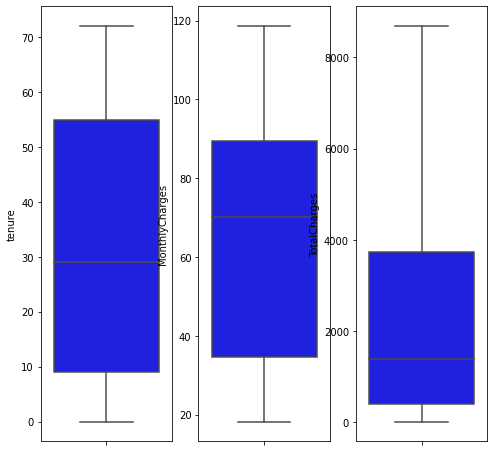

In [80]:
# Plot diagram box untuk kolom sebelum handling outliers dilakukan
f, axes = plt.subplots(1, 3, figsize=(8, 8))
sns.boxplot(y="tenure", data=X_train, ax=axes[0], color='b')
sns.boxplot(y="MonthlyCharges", data=X_train, ax=axes[1], color='b')
sns.boxplot(y="TotalCharges", data=X_train, ax=axes[2], color='b')
plt.show()

Tidak ditemukan keberadaan outliers berdasarkan box diagram, sehingga handling outliers tdk perlu dilakukan

### Pipeline (Sklearn)

Buat pipeline sklearn utk preprocessing data numerik dan kategorikal menggunakan Column Transformers

In [81]:
# Buat list nama2 kolom numerik dan kategorikal
cat_columns = ['Contract','TechSupport','OnlineSecurity','InternetService','OnlineBackup','PaymentMethod']
num_columns = ['tenure','MonthlyCharges','TotalCharges']

Untuk kolom numerik akan dilakukan imputasi missing values dgn strategi nilai median. Berikutnya lakukan scaling menggunakan MinMaxScaler krn bentuk data skewed sesuai hasil boxplot. Untuk kolom kategorikal, lakukan encoding menggunakan onehotencoder utk mengubah label menjadi bilangan biner.

In [82]:
# Create A Pipeline
num_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                             MinMaxScaler())

cat_pipeline = make_pipeline(OneHotEncoder())

final_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
])

Lakukan fit dan transform pipeline utk X_train, X_val dan X_test

In [83]:
# Fit and Transform
X_train = final_pipeline.fit_transform(X_train)
X_val = final_pipeline.transform(X_val)
X_test = final_pipeline.transform(X_test)
X_train.shape

(4494, 22)

### Handling Imbalance

Karena berdasarkan EDA data target mengalami imbalance, lakukan handling imbalance menggunakan SMOTE

In [84]:
# Lakukan SMOTE utk mengubah komposisi label menjadi 50:50
smote = SMOTE(random_state=100)
X_train, y_train = smote.fit_resample(X_train, y_train)
y_train.value_counts()

1    3323
0    3323
Name: Churn, dtype: int64

# VI. Model Definition

Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

### Pipeline (TensorFlow)

Buat pipeline TensorFlow utk proses repeat, shuffle dan batch. Jumlah repeat adlh 4, jumlah shuffle adlh 100 dan jumlah batch adlh 128.

In [87]:
# Lakukan repeat, shuffle dan batch pada train_pipe
train_pipe = tf.data.Dataset.from_tensor_slices((X_train,y_train)).repeat(4).shuffle(100).batch(128)
# Lakukan batch pada test_pipe
test_pipe = tf.data.Dataset.from_tensor_slices((X_test,y_test)).batch(128)
# Lakukan batch pada val_pipe
val_pipe = tf.data.Dataset.from_tensor_slices((X_val,y_val)).batch(128)

In [88]:
# Tampilkan satu sampel pada train_pipe
for row in train_pipe.take(1):
  print(row)

(<tf.Tensor: shape=(128, 22), dtype=float64, numpy=
array([[0.33333333, 0.10812157, 0.07722132, ..., 0.        , 1.        ,
        0.        ],
       [0.73611111, 0.77428999, 0.57905608, ..., 0.        , 1.        ,
        0.        ],
       [0.77777778, 0.86198306, 0.67188438, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.97222222, 0.87493772, 0.86951881, ..., 0.        , 1.        ,
        0.        ],
       [0.31944444, 0.51071251, 0.18847219, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.86347783, 0.86760905, ..., 1.        , 0.        ,
        0.        ]])>, <tf.Tensor: shape=(128,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 

### Sequential API

Buat ANN dgn model sequential API. Skemanya adalah input layer dgn 5 neuron, fungsi aktivasi relu dan 22 fitur. Kemudian satu hidden layer dgn 10 neuron dan fungsi aktivasi relu. Lalu output layer dgn 1 neuron dan fungsi aktivasi sigmoid. Batch normalization ditambahkan sebelum dan setelah hidden layer. Fungsi dari batch normalization adalah utk mempercepat dan menstabilkan proses training model. Dropout rate ditentukan sebesar 20% dan ditempatkan sblm output layer. Dropout berfungsi sebagai regularisasi supaya weight pada neuron tdk terlalu sensitif thd weight neuron di layer sebelahnya. 

Berikutnya model di-compile menggunakan loss function binary-crossentropy (krn problem klasifikasi biner), optimizer adam (salah satu optimizer terbaik) dgn metriks accuracy score.

In [89]:
# Create Sequential API
model_sequential1 = Sequential()
model_sequential1.add(Dense(5, activation='relu', input_shape=(22,))) # Input Layer
model_sequential1.add(BatchNormalization())
model_sequential1.add(Dense(10, activation='relu')) # Hidden Layer 2
model_sequential1.add(BatchNormalization())
model_sequential1.add(Dropout(0.2))
model_sequential1.add(Dense(1, activation='sigmoid')) # Output Layer

# Compile model
model_sequential1.compile(loss='binary_crossentropy',
                         optimizer='Adam',
                         metrics='accuracy')

model_sequential1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 115       
                                                                 
 batch_normalization (BatchN  (None, 5)                20        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 10)                60        
                                                                 
 batch_normalization_1 (Batc  (None, 10)               40        
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1

Jumlah total paramater adlh 246 parameter dan sebanyak 216 parameter akan melalui training.

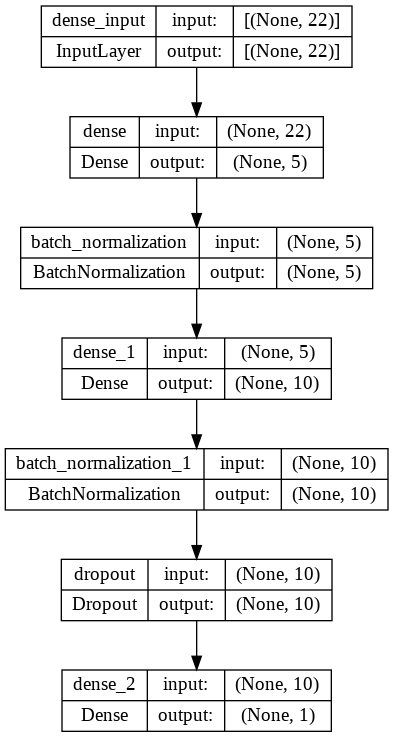

In [90]:
# Plot Layers
tf.keras.utils.plot_model(model_sequential1, show_shapes=True)

Gambar diatas adlh skema sequential API. Proses training terjadi scr berurutan dgn feed forward terjadi dari satu layer ke layer berikutnya.

### Functional API

Mirip dgn ANN model sequential, pada model functional API juga menggunakan struktur input layer (5 neuron, fungsi aktivasi relu), 1 hidden layer (10 neuron, fungsi aktivasi relu) dan output layer (1 neuron, fungsi aktivasi sigmoid). Hanya satu batch normalization diterapkan setelah input layer. Droput rate diterapkan sblm hidden layer dgn rate 20%. 

Berikutnya model di-compile menggunakan loss function binary-crossentropy (krn problem klasifikasi biner), optimizer adam (salah satu optimizer terbaik) dgn metriks accuracy score.

In [91]:
# Create Functional API
input_layer1 = Input(shape=(22,))
hidden1_layer1 = Dense(5, activation='relu')(input_layer1)
bn1 = BatchNormalization()(hidden1_layer1)
dropout1 = Dropout(0.2)(bn1)
hidden2_layer1 = Dense(10, activation='relu')(dropout1)

concat_layer1 = concatenate([input_layer1, hidden2_layer1])
output_layer1 = Dense(1, activation='sigmoid')(concat_layer1)

model_functional1 = Model(inputs=input_layer1, outputs=output_layer1)

# Compile model
model_functional1.compile(loss='binary_crossentropy',
                         optimizer='Adam',
                         metrics=['accuracy'])

model_functional1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 22)]         0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 5)            115         ['input_1[0][0]']                
                                                                                                  
 batch_normalization_2 (BatchNo  (None, 5)           20          ['dense_3[0][0]']                
 rmalization)                                                                                     
                                                                                                  
 dropout_1 (Dropout)            (None, 5)            0           ['batch_normalization_2[0][0]

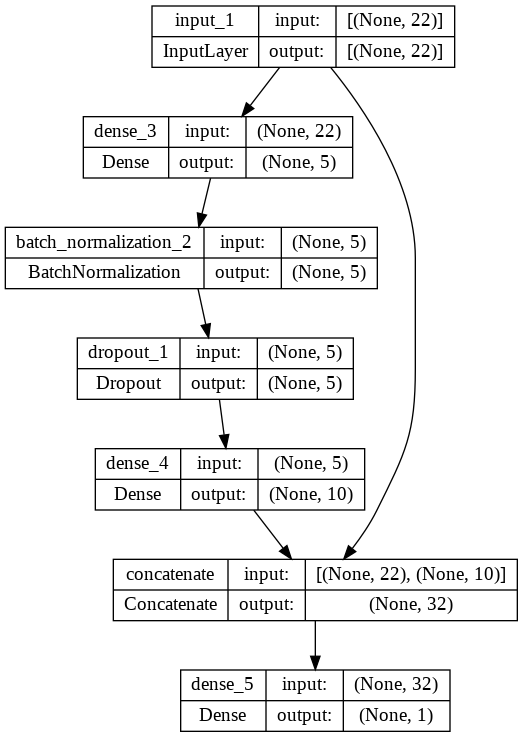

In [92]:
# Plot Layers
tf.keras.utils.plot_model(model_functional1, show_shapes=True)

Berbeda dgn sequential API, alur proses feed-forward pada functional API dapat langsung menuju input layer hasil concatenate antara input layer pertama dan hidden layer. 

# VII. Model Training

Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.



### Sequential API

Training model menggunakan epoch 20, artinya akan ada 20 looping thd dataset saat proses training. 

In [93]:
# Train the Model
%%time 
history_seq1 = model_sequential1.fit(train_pipe, 
                                   epochs=20, 
                                   validation_data=val_pipe
                                   )


Epoch 1/20
208/208 [==============================] - 4s 5ms/step - loss: 0.7765 - accuracy: 0.5829 - val_loss: 0.6016 - val_accuracy: 0.7162
Epoch 2/20
208/208 [==============================] - 1s 4ms/step - loss: 0.6762 - accuracy: 0.6346 - val_loss: 0.5766 - val_accuracy: 0.7456
Epoch 3/20
208/208 [==============================] - 1s 4ms/step - loss: 0.6575 - accuracy: 0.6473 - val_loss: 0.5714 - val_accuracy: 0.7553
Epoch 4/20
208/208 [==============================] - 1s 4ms/step - loss: 0.6488 - accuracy: 0.6498 - val_loss: 0.5682 - val_accuracy: 0.7562
Epoch 5/20
208/208 [==============================] - 1s 4ms/step - loss: 0.6445 - accuracy: 0.6541 - val_loss: 0.5613 - val_accuracy: 0.7607
Epoch 6/20
208/208 [==============================] - 1s 4ms/step - loss: 0.6380 - accuracy: 0.6600 - val_loss: 0.5611 - val_accuracy: 0.7598
Epoch 7/20
208/208 [==============================] - 1s 4ms/step - loss: 0.6366 - accuracy: 0.6633 - val_loss: 0.5592 - val_accuracy: 0.7616
Epoch 

### Functional API

Training model juga menggunakan epoch 20, artinya akan ada 20 looping thd dataset saat proses training. 

In [94]:
# Train the Model
%%time 
history_func1 = model_functional1.fit(train_pipe, 
                                   epochs=20, 
                                   validation_data=(val_pipe) 
                                   )

Epoch 1/20
208/208 [==============================] - 2s 4ms/step - loss: 0.7203 - accuracy: 0.5559 - val_loss: 0.5934 - val_accuracy: 0.6931
Epoch 2/20
208/208 [==============================] - 1s 4ms/step - loss: 0.6234 - accuracy: 0.6812 - val_loss: 0.5470 - val_accuracy: 0.7206
Epoch 3/20
208/208 [==============================] - 1s 4ms/step - loss: 0.5839 - accuracy: 0.7097 - val_loss: 0.5372 - val_accuracy: 0.7189
Epoch 4/20
208/208 [==============================] - 1s 5ms/step - loss: 0.5571 - accuracy: 0.7275 - val_loss: 0.5338 - val_accuracy: 0.7144
Epoch 5/20
208/208 [==============================] - 1s 6ms/step - loss: 0.5404 - accuracy: 0.7354 - val_loss: 0.5320 - val_accuracy: 0.7180
Epoch 6/20
208/208 [==============================] - 1s 4ms/step - loss: 0.5251 - accuracy: 0.7501 - val_loss: 0.5320 - val_accuracy: 0.7171
Epoch 7/20
208/208 [==============================] - 1s 3ms/step - loss: 0.5126 - accuracy: 0.7596 - val_loss: 0.5325 - val_accuracy: 0.7198
Epoch 

# VIII. Model Evaluation

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

### Sequential API

Tampilkan history, plot grafik dan classification report

In [95]:
# Create DataFrame
history_seq_df1 = pd.DataFrame(history_seq1.history)
history_seq_df1

,loss,accuracy,val_loss,val_accuracy
0,0.776506,0.582907,0.601641,0.716192
1,0.676183,0.634630,0.576600,0.745552
2,0.657481,0.647269,0.571428,0.755338
3,0.648830,0.649789,0.568232,0.756228
4,0.644464,0.654115,0.561309,0.760676
5,0.638029,0.660021,0.561096,0.759786
6,0.636576,0.663294,0.559160,0.761566
7,0.633981,0.663369,0.555471,0.764235
8,0.628972,0.670178,0.550329,0.767794
9,0.626119,0.676046,0.544886,0.767794


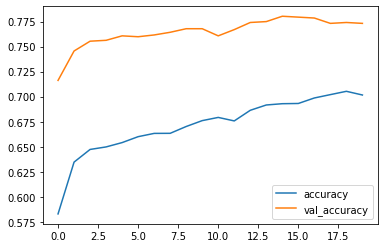

In [96]:
# Plot between accuracy and val_accuracy

history_seq_df1[['accuracy', 'val_accuracy']].plot()

Pada plot grafik accuracy diatas, gap antara validation dan training set cukup lebar. Artinya, accuracy utk validation set cenderung lbh besar dibanding training set. Namun, pola accuracy validation set cenderung tdk stabil di epoch > 15. Sebaliknya, pola accuracy training set cenderung meningkat dgn stabil. Kedua grafik mengalami peningkatan drastis pada epoch 1-3. 

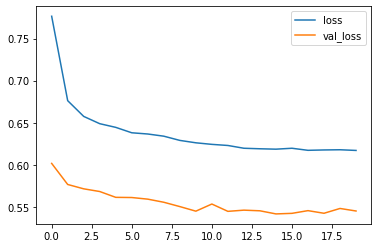

In [97]:
# Plot between loss and val_loss
history_seq_df1[['loss', 'val_loss']].plot()

Pola validation loss berada lbh rendah dari training loss dgn gap cukup jauh. Penurunan drastis terjadi pada epoch 1-3, dimana area ini model mengalami underfit. Namun, secara general terjadi juga underfitting pada training model krn loss function pada validation set berada jauh dibawah training set.

In [98]:
# Model Evaluation

from sklearn.metrics import classification_report 

y_pred_seq1 = model_sequential1.predict(X_test)
y_pred_seq1 = np.where(y_pred_seq1 >=0.5, 1, 0)

print(classification_report(y_test, y_pred_seq1))

44/44 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1016
           1       0.59      0.70      0.64       389

    accuracy                           0.78      1405
   macro avg       0.73      0.76      0.74      1405
weighted avg       0.80      0.78      0.79      1405



Model memiliki f-1 score secara macro sebesar 0.74. Model memiliki f-1 score lbh baik pada label 0 (0.85) dibandingkan label 1 (0.62), meskipun handling imbalance sudah dilakukan. Nilai precision dan recall secara macro adlh sama (0.74)

### Functional API

Tampilkan history, plot grafik dan classification report

In [99]:
# Create DataFrame
history_functional_df1 = pd.DataFrame(history_func1.history)
history_functional_df1

,loss,accuracy,val_loss,val_accuracy
0,0.720299,0.555898,0.593442,0.693061
1,0.623365,0.681162,0.546961,0.720641
2,0.583924,0.709713,0.537236,0.718861
3,0.557145,0.727505,0.533831,0.714413
4,0.540444,0.735442,0.531997,0.717972
5,0.525053,0.750075,0.532030,0.717082
6,0.512554,0.759555,0.532501,0.719751
7,0.500138,0.770200,0.537049,0.722420
8,0.487916,0.779868,0.535788,0.724199
9,0.476072,0.790175,0.532691,0.733096


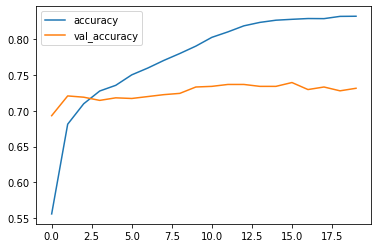

In [100]:
# Plot between accuracy and val_accuracy
history_functional_df1[['accuracy', 'val_accuracy']].plot()

Berbeda dgn plot grafik utk sequential API, pada kasus functional API model mengalami overfitting. Pada awalnya, validation accuracy berimpitan dgn training accuracy. Training accuracy memiliki accuracy buruk pada epoch < 3. Namun, accuracy utk training model semakin melebar di atas grafik validation model pada epoch >2. Sedangkan validation accuracy cenderung stagnan dgn sedikit spike pada epoch >3. Artinya, diatas epoch 3 model mengalami vanishing gradient dimana penambahan epoch tdk lagi meningkatkan accuracy.


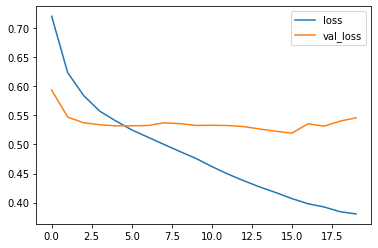

In [101]:
# Plot between loss and val_loss
history_functional_df1[['loss', 'val_loss']].plot()

Hal yg sama ditemukan pada loss function dimana loss function utk validation set berada diatas training set seiring semakin bertambahnya epoch. Namun, penambahan epoch pada akhirnya tdk berpengaruh pada accuracy validation set krn efek vanishing gradient. Secara keseluruhan model mengalami overfitting.

In [102]:
# Model Evaluation

y_pred_func1 = model_functional1.predict(X_test)
y_pred_func1 = np.where(y_pred_func1 >=0.5, 1, 0)

print(classification_report(y_test, y_pred_func1))

44/44 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1016
           1       0.52      0.80      0.63       389

    accuracy                           0.74      1405
   macro avg       0.71      0.76      0.72      1405
weighted avg       0.80      0.74      0.75      1405



f-1 score utk functional API lbh buruk (0.71) dibandingkan sequential API (0.74. Nilai terburuk didapatkan pada precision utk label 1 (0.51) kemudian recall utk label 0 (0.69). Artinya prediksi model kurang bisa dipercaya ketika memprediksi label 1.  

# IX. Model Improvement

Permasalahan utama pada model sblm improvement adalah:

1. Gap antara training set dan validation set terlalu besar sehingga hasil prediksinya kurang reliable

2. Terdapat exploding pada grafik

3. Terdapat vanishing gradient

Ketiga masalah tersebut akan coba diperbaiki pada bagian ini.

### Sequential API

Utk sequential API, batch normalization dan dropout akan dihilangkan krn malah membuat model menjadi underfitting. Untuk mengatasinya, jumlah neuron hidden layer akan ditingkatkan dari 10 menjadi 100. Untuk mengatasi exploding, akan digunakan regularizer l2.

In [103]:
# Create Sequential API
model_sequential2 = Sequential()
model_sequential2.add(Dense(5, activation='relu', input_shape=(22,),kernel_regularizer='l2')) # Input Layer
model_sequential2.add(Dense(100, activation='relu')) # Hidden Layer 2
model_sequential2.add(Dense(1, activation='sigmoid')) # Output Layer

# Compile
model_sequential2.compile(loss='binary_crossentropy',
                         optimizer='Adam',
                         metrics='accuracy')

model_sequential2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 115       
                                                                 
 dense_7 (Dense)             (None, 100)               600       
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 816
Trainable params: 816
Non-trainable params: 0
_________________________________________________________________


Berikutnya training model.

In [104]:
# Train the Model
%%time 
history_seq2 = model_sequential2.fit(train_pipe, 
                                   epochs=20, 
                                   validation_data=val_pipe
                                   )

Epoch 1/20
208/208 [==============================] - 2s 6ms/step - loss: 0.6824 - accuracy: 0.6837 - val_loss: 0.6225 - val_accuracy: 0.6966
Epoch 2/20
208/208 [==============================] - 1s 5ms/step - loss: 0.6026 - accuracy: 0.7319 - val_loss: 0.5938 - val_accuracy: 0.7109
Epoch 3/20
208/208 [==============================] - 1s 5ms/step - loss: 0.5798 - accuracy: 0.7388 - val_loss: 0.5788 - val_accuracy: 0.7144
Epoch 4/20
208/208 [==============================] - 1s 6ms/step - loss: 0.5669 - accuracy: 0.7419 - val_loss: 0.5699 - val_accuracy: 0.7206
Epoch 5/20
208/208 [==============================] - 1s 5ms/step - loss: 0.5585 - accuracy: 0.7431 - val_loss: 0.5644 - val_accuracy: 0.7189
Epoch 6/20
208/208 [==============================] - 1s 4ms/step - loss: 0.5525 - accuracy: 0.7445 - val_loss: 0.5607 - val_accuracy: 0.7180
Epoch 7/20
208/208 [==============================] - 1s 5ms/step - loss: 0.5479 - accuracy: 0.7445 - val_loss: 0.5582 - val_accuracy: 0.7224
Epoch 

Tampilkan history, plot grafik dan classification report

In [105]:
# Create DataFrame
history_seq_df2 = pd.DataFrame(history_seq2.history)
history_seq_df2

,loss,accuracy,val_loss,val_accuracy
0,0.682355,0.683720,0.622521,0.696619
1,0.602551,0.731869,0.593821,0.710854
2,0.579780,0.738828,0.578803,0.714413
3,0.566903,0.741912,0.569920,0.720641
4,0.558526,0.743079,0.564449,0.718861
5,0.552545,0.744546,0.560694,0.717972
6,0.547917,0.744470,0.558153,0.722420
7,0.544491,0.744583,0.555650,0.722420
8,0.541685,0.744771,0.554173,0.724199
9,0.539498,0.744884,0.553426,0.725089


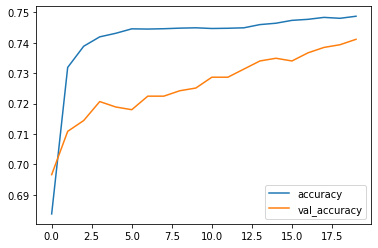

In [106]:
# Plot between accuracy and val_accuracy
history_seq_df2[['accuracy', 'val_accuracy']].plot()

Underfitting berubah menjadi overfitting saat parameter sequential API diubah. Namun, ini masih lbh baik krn gap antara validation dan training set tidak lebar. Selain itu, masalah vanishing gradient tetap ada terutama pada training accuracy pada epoch > 3. Namun, ini bisa diartikan bahwa epoch 3 saja cukup utk mendapat model dgn nilai accuracy optimal, sehingga mempercepat training process.

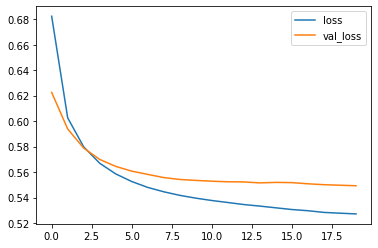

In [107]:
# Plot between loss and val_loss
history_seq_df2[['loss', 'val_loss']].plot()

Kita lihat pada grafik loss function terjadi peningkatan signifikan terhadap profile grafiknya. Grafik training set dan validation set berimpitan sepanjang epoch, namun vanishing gradient tdk terlalu buruk dibanding sebelumnya. Regularisasi jg berhasil menghilangkan exploding gradient

In [110]:
# Model Evaluation
y_pred_seq2 = model_sequential2.predict(X_test)
y_pred_seq2 = np.where(y_pred_seq2 >=0.5, 1, 0)

print(classification_report(y_test, y_pred_seq2))

44/44 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1016
           1       0.53      0.79      0.64       389

    accuracy                           0.75      1405
   macro avg       0.72      0.76      0.72      1405
weighted avg       0.80      0.75      0.76      1405



Nilai f-1 score pada classification report relatif tdk berubah

### Functional API

Utk functional API, batch normalization dan dropout akan dihilangkan. Pada input layer, digunakan kernel_regularizer l2 utk mencegah exploding gradient dan kernel_initializer glorot_normal utk metode inisiasi weight. Selain itu, jumlah neuron hidden layer akan ditingkatkan dari 10 menjadi 100.

In [111]:
# Create Functional API
input_layer2 = Input(shape=(22,))
hidden1_layer2 = Dense(5, activation='relu',kernel_regularizer='l2',kernel_initializer='glorot_normal')(input_layer2)
hidden2_layer2 = Dense(100, activation='relu')(hidden1_layer2)

concat_layer2 = concatenate([input_layer2, hidden2_layer2])
output_layer2 = Dense(1, activation='sigmoid')(concat_layer2)

model_functional2 = Model(inputs=input_layer2, outputs=output_layer2)

# Compile model
model_functional2.compile(loss='binary_crossentropy',
                         optimizer='Adam',
                         metrics=['accuracy'])

model_functional2.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 22)]         0           []                               
                                                                                                  
 dense_12 (Dense)               (None, 5)            115         ['input_3[0][0]']                
                                                                                                  
 dense_13 (Dense)               (None, 100)          600         ['dense_12[0][0]']               
                                                                                                  
 concatenate_2 (Concatenate)    (None, 122)          0           ['input_3[0][0]',                
                                                                  'dense_13[0][0]']         

In [112]:
# Train the Model
%%time 
history_func2 = model_functional2.fit(train_pipe, 
                                   epochs=20, 
                                   validation_data=(val_pipe) 
                                   )

Epoch 1/20
208/208 [==============================] - 2s 4ms/step - loss: 0.6858 - accuracy: 0.6384 - val_loss: 0.5886 - val_accuracy: 0.7126
Epoch 2/20
208/208 [==============================] - 1s 3ms/step - loss: 0.5866 - accuracy: 0.7353 - val_loss: 0.5731 - val_accuracy: 0.7020
Epoch 3/20
208/208 [==============================] - 1s 5ms/step - loss: 0.5651 - accuracy: 0.7402 - val_loss: 0.5642 - val_accuracy: 0.7046
Epoch 4/20
208/208 [==============================] - 1s 6ms/step - loss: 0.5539 - accuracy: 0.7432 - val_loss: 0.5577 - val_accuracy: 0.7064
Epoch 5/20
208/208 [==============================] - 1s 4ms/step - loss: 0.5467 - accuracy: 0.7446 - val_loss: 0.5531 - val_accuracy: 0.7126
Epoch 6/20
208/208 [==============================] - 1s 4ms/step - loss: 0.5415 - accuracy: 0.7457 - val_loss: 0.5500 - val_accuracy: 0.7117
Epoch 7/20
208/208 [==============================] - 1s 3ms/step - loss: 0.5374 - accuracy: 0.7470 - val_loss: 0.5476 - val_accuracy: 0.7100
Epoch 

Tampilkan history, plot accuracy dan loss function

In [113]:
# Create DataFrame
history_functional_df2 = pd.DataFrame(history_func2.history)
history_functional_df2

,loss,accuracy,val_loss,val_accuracy
0,0.685822,0.638354,0.588640,0.712633
1,0.586583,0.735330,0.573108,0.701957
2,0.565056,0.740182,0.564186,0.704626
3,0.553903,0.743229,0.557738,0.706406
4,0.546671,0.744621,0.553079,0.712633
5,0.541475,0.745674,0.549972,0.711744
6,0.537377,0.746953,0.547553,0.709964
7,0.534334,0.746953,0.545085,0.712633
8,0.531647,0.747254,0.542553,0.717082
9,0.529223,0.746840,0.540730,0.720641


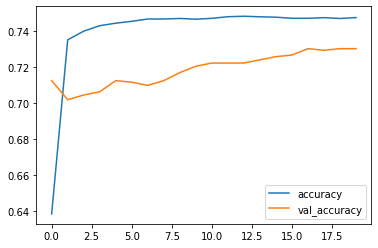

In [114]:
# Plot between accuracy and val_accuracy
history_functional_df2[['accuracy', 'val_accuracy']].plot()

Model masih mengalami overfitting, namun tdk terjadi vanishing gradient pada validation set. Selain itu gap menyempit selama bertambahnya epoch, sehingga performance model pada validation set semakin membaik sering jumlah epoch. Exploding juga tdk terlalu terlihat pada grafik. 

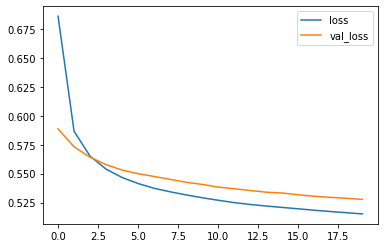

In [115]:
# Plot between loss and val_loss
history_functional_df2[['loss', 'val_loss']].plot()

Perbaikan signifikan ditemukan pada grafik loss function. Tidak terlihat adanya vanishing gradient krn grafik tetap menurun seiring bertambahnya epoch. Grafik utk validation set jauh membaik, dimana sblmnya mengalami vanishing dan gap sangat lebar dgn training set. Exploding sama sekali tdk ditemukan

In [116]:
# Model Evaluation
y_pred_func2 = model_functional2.predict(X_test)
y_pred_func2 = np.where(y_pred_func2 >=0.5, 1, 0)

print(classification_report(y_test, y_pred_func2))

44/44 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1016
           1       0.52      0.80      0.63       389

    accuracy                           0.74      1405
   macro avg       0.71      0.76      0.71      1405
weighted avg       0.80      0.74      0.75      1405



Sama halnya spt pada sequential API, tdk ditemukan perubahan berarti pada f-1 score model hasil improvement.

# X. Model Saving

Model akan di-save utk deployment

In [117]:
# Save Pipeline sklearn

with open('final_pipeline.pkl', 'wb') as file_1:
  joblib.dump(final_pipeline, file_1)

In [118]:
# Freeze sequential API dan functional API model

model_sequential2.trainable = False
model_functional2.trainable = False

In [119]:
# Save sequential API dan functional API model

model_sequential2.save('ann_seq_model.h5')
model_functional2.save('ann_fun_model.h5')


# XI. Model Inference

Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

Load model yg telah di-save:

In [120]:
# Load The Models

with open('final_pipeline.pkl', 'rb') as file_1:
  model_pipeline = joblib.load(file_1)

from tensorflow.keras.models import load_model
model_ann_seq = load_model('ann_seq_model.h5')

from tensorflow.keras.models import load_model
model_ann_fun = load_model('ann_fun_model.h5')


Transformasi dataset inference menggunakan pipeline sklearn

In [121]:
# Transform Inference-Set 

df_inf_transform = model_pipeline.transform(df_inf)
df_inf_transform

array([[6.94444444e-01, 2.29197808e-02, 1.21030464e-01, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.59441953e-02, 1.63316409e-01, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [8.75000000e-01, 5.03736921e-01, 4.72253635e-01, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00

Prediksi dataset inference menggunakan model ANN Sequential API dan Functional API

In [122]:
# Predict using ANN Sequential API
y_seq_pred_inf = model_ann_seq.predict(df_inf_transform)
y_seq_pred_inf = np.where(y_seq_pred_inf >= 0.5, 1, 0)
y_seq_pred_inf

1/1 [==============================] - 0s 144ms/step


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1]])

In [123]:
# Predict using ANN Functional API
y_fun_pred_inf = model_ann_fun.predict(df_inf_transform)
y_fun_pred_inf = np.where(y_fun_pred_inf >= 0.5, 1, 0)
y_fun_pred_inf

1/1 [==============================] - 0s 86ms/step


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1]])

Buat dataset target inference:

In [124]:
# Buat target inference
y_inf = df_inf['Churn']
# Replace nilai Yes dan No menjadi 1 dan 0
y_inf = y_inf.replace(['Yes','No'],[1,0])

Selanjutnya print classification report masing2 model pada dataset inference:

In [125]:
# Print classification report untuk model sequential
print(classification_report(y_inf, y_seq_pred_inf))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.75      0.75      0.75         4

    accuracy                           0.90        20
   macro avg       0.84      0.84      0.84        20
weighted avg       0.90      0.90      0.90        20



In [126]:
# Print classification report untuk model functional
print(classification_report(y_inf, y_fun_pred_inf))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.75      0.75      0.75         4

    accuracy                           0.90        20
   macro avg       0.84      0.84      0.84        20
weighted avg       0.90      0.90      0.90        20



Hasil f1-score lebih baik daripada pada test set. Mungkin hal ini krn sampelnya hanya sedikit. Namun ini berarti performance model sudah cukup valid.

# XII. Kesimpulan

Faktor utama yg mempengaruhi keputusan user utk churn adalah harga dan kualitas layanan. User yg membayar monthly charges lbh besar cenderung akan churn dgn masa kontrak (tenure) lbh singkat jika layanannya tdk sesuai ekspektasi. Meskipun layanan fiber optic lbh disukai oleh user krn berteknologi lbh tinggi, teknologi fiber optic bisa menyebabkan kompleksitas dlm penggunaannya dan tanpa diimbangi oleh technical support yg baik akan menyebabkan user utk churn. Di sisi lain, sebagian besar user yg churn memilih kontrak bulanan dibandingkan tahunan. Hal ini menandakan user masih mencoba2 layanan telekomunikasi sehingga jika mereka tdk puas dgn layanan atau menemukan layanan dari provider lain yg lbh baik mereka akan churn. 

Pada model ANN dgn Sequential API sebelum improvement digunakan skema input layer (5 neuron, relu), batch normalization,1 hidden layer (10 neuron, relu), batch normalization, dropout(0.2)  dan output layer (1 neuron, sigmoid). Hasil plot grafik accuracy ditemukan gap antara validation dan training set cukup lebar. Accuracy utk validation set lbh besar menandakan terjadinya underfit. Kedua grafik meningkat tajam sampai epoch 3, kemudian sedikit melandai. Terjadi exploding pada validation set pada epoch >15. Hasil plot grafik loss juga ditemukan gap antara validation dan training set cukup lebar. Penurunan drastic terjadi pada epoch 1-3 dimana model mengalami underfit. Secara general model mengalami underfitting krn loss function pada validation set berada jauh dibawah training set.

Model improvement dilakukan pada Sequential API menggunakan skema input layer (5 neuron, relu, regularizer=l2), 1 hidden layer (100 neuron, relu) dan output layer (1 neuron, sigmoid). Hasil plot grafik accuracy menandakan terjadinya sedikit overfitting, namun gap antara validation dan training set menyempit. Kedua grafik meningkat tajam sampai epoch 3, kemudian sedikit melandai. Tidak terdapat exploding gradient. Hasil plot grafik loss menunjukkan hasil yg baik dgn kedua grafik berimpitan. Penurunan drastic terjadi pada epoch 1-3 dimana model mengalami underfit. Namun, tidak terdapat exploding dan vanishing gradient.

Model Sequential API memiliki f-1 score scr macro sebesar 0.74. f-1 score lebih baik pada label 0 (0.85) dibandingkan label 1 (0.62) meskipun handling imbalance telah dilakukan. Nilai precision dan recall secara macro adlh 0.74. Hasil classification report relative tdk berubah setelah improvement.

Pada model ANN dgn Functional API sebelum improvement digunakan skema input layer (5 neuron, relu), batch normalization, batch normalization, dropout(0.2), 1 hidden layer (10 neuron, relu) dan output layer (1 neuron, sigmoid). Hasil plot grafik accuracy ditemukan gap antara validation dan training set semakin melebar seiring bertambahnya epoch. Accuracy utk training set lbh besar dari validation set menandakan terjadinya underfit. Kedua grafik meningkat tajam sampai epoch 3, kemudian melandai. Terjadi exploding dan vanishing gradient pada validation set. Hasil plot grafik loss juga ditemukan gap antara validation dan training set yg semakin melebar. Penurunan drastic terjadi pada epoch 1-3 dimana model mengalami underfit. Namun, secara keseluruhan epoch, model mengalami overfit krn kemudian grafik loss validation set melandai diatas grafik loss training set. Terjadi exploding dan vanishing gradient pada validation set.

Model improvement dilakukan pada Functional API menggunakan skema input layer (5 neuron, relu, regularizer=l2, initializer=glorot_normal), 1 hidden layer (100 neuron, relu) dan output layer (1 neuron, sigmoid). Hasil plot grafik accuracy awalnya menandakan terjadinya  overfitting, namun gap antara validation dan training set semakin menyempit. Grafik training setmeningkat tajam sampai epoch 3, kemudian sedikit melandai. Tidak terdapat exploding gradient. Hasil plot grafik loss menunjukkan hasil yg baik dgn kedua grafik berimpitan. Penurunan drastic terjadi pada epoch 1-3 dimana model mengalami underfit. Namun, tidak terdapat exploding dan vanishing gradient.

f-1 score utk Functional API lbh buruk (0.71) dibandingkan Sequential API (0.74). Nilai terburuk didapatkan pada precision utk label 1 (0.51) kemudian recall utk label 0 (0.69), sehingga prediksi model kurang dapat dipercaya utk prediksi label 1.

Kesimpulannya, model dgn Sequential API hasil improvement menghasilkan performance terbaik. Meskipun improvement tdk mengubah hasil classification report, tetapi memperbaiki proses training model pada setiap epoch-nya. Selain itu, model lbh baik dalam memprediksi label 0 dibandingkan label 1. Hal ini tdk critical pada case customer churning pada perusahaan telekomunikasi, krn artinya model akan memprediksi customer utk tidak churn padahal sebenarnya churn. Kesalahan ini masih dapat ditolerir selama model tidak menolak customer baru yg potensial.
